| [⬅️ Previous Exercise](Exercise2-3_Matplotlib.ipynb) | [🏠 Index](Index.ipynb) | [➡️ Bonus Content!](Labs.ipynb) |

# Exercise 3: Probability and Stochastic Processes with Scipy

![](assets/kenya_landscape.png)

Rainfall in many dryland ecosystems exhibits pronounced variability from year to year. Because rainfall occurs intermittently and with a low degree of predictability, we often are forced to characterize the occurrence and amount of rainfall in terms of **probability**. In this exercise, we will investigate the probabilistic nature of rainfall at various locations in Kenya. We will use these data to explore the concepts of probability and conditional probability, as well as probability density functions and cumulative density functions. We will use these data to develop a stochastic model of rainfall that can be used to generate  novel time series of rainfall and develop inference into the likelihood of various daily, monthly, seasonal, and annual rainfall totals. 


<div class="boxhead2">
    Exercise 3 Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 Analyze the probabilities and distribution of daily rainfall. </li>
    <li> 📌 Fit an exponential distribution to rainfall depths. </li>
    <li> 📌 Use our fitted distribution and rainfall probabilities to generate a stochastic model of daily rainfall. </li>
    <li> 📌 Use conditional probabilities to examine the independent nature of the daily rainfall process. </li>
    <li> 📌 Modify our model to generate monthly variation in rainfall probabilities and plot the results. </li>
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
Work through the exercise, writing code where indicated. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. Note: Do not restart the kernel and clear all outputs. If this happens, run the last cell in the notebook before proceeding.

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<p style="color:#008C96; font-weight: bold"> 📚 &nbsp; &nbsp; This symbol designates a practice question.  </p>


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

### Imports

First, let's load <span class="code">pandas</span> into our notebook. As usual, we use `pd` as the shortname for pandas and `np` as the shortname for <span class="code">numpy</span>. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in the data

All the data for our exercise are stored as `.csv` files. We will read the `.csv` file into a `DataFrame`. Note: be sure you have copied the file from the `data` folder.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [33]:
df = pd.read_csv(
    "../data/mpala_ranch_house_rainfall.csv",
    usecols=['Rainfall (mm)', 'Date', 'Year', 'Month', 'Day']
)
df.info()
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rainfall (mm)  15751 non-null  float64
 1   Date           16602 non-null  object 
 2   Year           16602 non-null  int64  
 3   Month          16602 non-null  int64  
 4   Day            16602 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 648.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rainfall (mm)  15751 non-null  float64
 1   date           16602 non-null  object 
 2   year           16602 non-null  int64  
 3   month          16602 non-null  int64  
 4   day            16602 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 648.6+ KB


```python
> df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 5 columns):
Rainfall (mm)    15751 non-null float64
Date             16602 non-null object
Year             16602 non-null int64
Month            16602 non-null int64
Day              16602 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 648.6+ KB
```

Here we see that the `DataFrame` has 16,602 entries (this is the number of rows in the `.csv` file), and contains 5 columns that are called `Rainfall (mm)`, `Date`, `Year`, `Month`, and `Day`. These column names are taken directly from the `.csv` header row.

<span class="code">Pandas</span> has auto-detected that `Year`, `Month`, and `Day` are all integers and the data in the `Rainfall (mm)` column are detected to be floating point numbers. The `Date` column has been categorized as an indeterminant `object` type (this is the default type, which means <span class="code">pandas</span> has no idea what to do with this column). We will come back to this in a bit, but first let's keep exploring our new `DataFrame`.


Let's take a look at the first few rows of the dataframe using the `head()` command.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [5]:
df.head()

Rainfall (mm)        Date  Year  Month  Day
0            0.0  1972-01-01  1972      1    1
1            0.0  1972-01-02  1972      1    2
2            0.0  1972-01-03  1972      1    3
3            0.0  1972-01-04  1972      1    4
4            0.0  1972-01-05  1972      1    5

## Determine yearly rainfall totals.

The most common – but not always the most useful – interval of rainfall characterization is annual. Let's see what years we have available to investigate annual rainfall, using the [`pd.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function.


<div class="example">
    ✏️ <b> Try it. </b> 
    Use the <code>pd.unique()</code> function to get a list of the unique years contained in the <code>Year</code> column of our dataframe, <code>df</code>. Assign this list of years to a new array called <code>all_years</code>
</div>

In [8]:
all_years = pd.unique(df.Year)
print(all_years)

[1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017]



If all goes well, you should get results that look like this: 
```python

> print(all_years)

[1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017]
```

It looks like we have almost five decades of rainfall data. The first thing we might want to do with this data is look at yearly summaries. 


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>



<div class="practice">
    📚  <b> Practice 1. (The following steps can be combined into a single line of code)</b> 
<ol class="alpha">
<li>Determine the annual rainfall totals for each year.</li>
<li>Use method chaining combined with the <code>df.groupby()</code> function to get the sum of every year's rainfall. </li>    
<li>Use the argument <code>min_count</code> in the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html"><code>sum()</code></a> command to force pandas to only include sums of rainfall for years with at least 350 days of data.</li>
    
<li>Assign these totals to a new <code>Series</code> variable called <code>yearly_rainfall_total</code>.</li> 

</ol>
</div>


In [12]:
yearly_rainfall_total = df.groupby('Year').sum(min_count = 350)['Rainfall (mm)']
yearly_rainfall_total.head()

Year
1972    681.228
1973        NaN
1974    378.968
1975    791.464
1976    363.220
Name: Rainfall (mm), dtype: float64

In [ ]:
If all goes correctly, you should get results that look like this: 

```python
> yearly_rainfall_total.head()

Year
1972    681.228
1973        NaN
1974    378.968
1975    791.464
1976    363.220
Name: Rainfall (mm), dtype: float64

```        


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>


## Quantifying rainfall variability

We can use the [coefficient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation) to describe rainfall variability. The coefficient of variation, $CV$, of a group of numbers is the ratio of the standard deviation, $\sigma$, to the mean, $\mu$. We can calculate the population CV of a sample, $\widehat{CV}$, as the ratio of standard deviation of the sample, $s$, and the sample mean, $\bar{x}$:

$$ \widehat{CV} = \frac{s}{\bar{x}} $$ 


<div class="example">
    ✏️ <b> Try it. </b>    
Create a histogram of yearly rainfall amounts using the  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html"><code>hist()</code></a> command that is a built-in method of any <code>pandas.Series</code>. <br>
    <br>
    Note: Your variable, <code>yearly_rainfall_total</code> should be a <code>pandas.Series</code> object.
</div>

<AxesSubplot:>

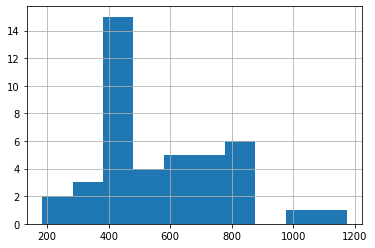

In [13]:
yearly_rainfall_total.hist()

We have a very pronounced mode, with a large degree of variation. Let's calculate the $\widehat{CV}$.

<div class="example">
    ✏️ <b> Try it. </b>    
Use the formula above to calculate the $\widehat{CV}$ for the data in <code>yearly_rainfall_total</code>.
</div>

In [19]:
yearly_rainfall_total.std() / yearly_rainfall_total.mean()

0.35555343034118253

$\widehat{CV}$ has some problems dealing with small sample sizes (n) and tends to be biased low. We can create an unbiased estimator, $\widehat{CV}^{*}$ using the following function${^1}$:

$$ \widehat{CV}^{*} = \left(1 + \frac{1}{4n}\right)\widehat{CV} $$

${^1}$ _technically, $\widehat{CV}^{*}$ is only valid for normally-distributed data, but we will use it anyway as an example._

<div class="practice">
    📚  <b> Practice 2.</b>
    Create a function that calculates the $\widehat{CV}^{*}$ for a set of data and use the function to determine the $\widehat{CV}^{*}$ value for our yearly rainfall data.
</div>

In [21]:
cv = (1 + 1/(4*len(yearly_rainfall_total))) * yearly_rainfall_total.std() / yearly_rainfall_total.mean()
print(cv)

0.35748578594086283


## Examining daily rainfall probabilities and amounts

As we see from the analysis of yearly and monthly rainfall, the climatology of this location is characterized by a fairly high degree of variability. The same is true of many tropical drylands.

### 1. What is the chance that it will rain?
In order to get at the rainfall process itself, let's look at the distribution of rainfall events. We can find all the days of rainfall by simply filtering our `DataFrame` to find days when rain was greater than zero. To do this, we can use the `loc()` function.

The following line of code returns a new dataframe that contains only the rows where `'Rainfall (mm)'` is greater than zero:

```python
rainy_days = df.loc[ (df['Rainfall (mm)'] > 0) ]

```


<div class="practice">
    📚  <b> Practice 3.</b>
    Calculate the overall probability of daily rainfall.
    <ol class="alpha">
        <li> Create a <code>DataFrame</code> containing only rainy days (when rainfall is greater than zero) called <code>rainy_days</code></li>
        <li> Create a <code>DataFrame</code> consisting of all observation days (when rainfall is not equal to <code>NaN</code>) called <code>all_days</code></li>
        <li> Use the ratio of the length of <code>rainy_days</code> and <code>all_days</code> to determine the probability of rainfall and save this as a new variable called <code>prob_rain</code>.</li>
    </ol>
</div>

In [26]:
rainy_days = df.loc[ (df['Rainfall (mm)'] > 0) ]
all_days = df.loc[ (df['Rainfall (mm)'].notnull() ) ]
prob_rain = len(rainy_days) / len(all_days)
print(prob_rain)

0.13211859564472098


If all goes well, then you should get the following value for `prob_rain`:
```python

> print(prob_rain)
0.13211859564472098
```

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

### Monthly Rainfall Totals and Probabilities

Over the entire time period, the probability of rainfall was about 13%, which means that it rains - on average - a little less than once per week (approximately every 7.7 days). However, most regions have strong seasonality in rainfall. Our data comes from a site that is located very close to the equator in central Kenya. This means that the movement of the ITCZ across the tropics causes changes in the likelihood of rainfall from month to month. We should therefore look at monthly rainfall probabilies rather than simply the annual average.

<div class="practice">
    📚  <b> Practice 4.</b>
    <ol class="alpha">
        <li> Determine the probability of rainfall for each month. Add these values to a list called <code>lambda_by_month</code>. Hint: You can combine test criteria using logical operators (i.e. <code>&</code> and <code>|</code>).
        <li>Create a bar graph of the monthly rainfall probabilites. Label your plot appropriately.
    </ol>
</div>

In [ ]:
lambda_by_month = 

### 2. What is the amount that it will rain?

We've already subsetted all of our data for days with rain and stored this in the variable `rainy_days`. Let's look at the distribution of rain amounts:

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
rainy_days['Rainfall (mm)'].hist(bins=50)

As opposed to the annual rainfall distribution, the distribution of daily storm totals (or daily rainfall) has a much clearer distribution. This pattern of daily rainfall – a positively skewed distribution with a short-tail – is _very_ consistent with what we see across tropical drylands, and even more broadly across any location where rainfall is dominated by convective processes. We might ask what the average storm total is...

<div class="example">
    ✏️ <b> Try it. </b>    
    Calculate the average rainfall amount on rainy days over the data record. Save this quantity as a new variable called <code>avg_rainfall_depth</code>.
</div>

## Fitting rainfall depths to an exponential distribution

A simple rainfall model makes two assumptions; (1) that events arrive according to a Poisson process, and (2) that rainfall depths are distributed according to an exponential distribution. These two assumptions are accompanied by the need for two rainfall parameters; (1) the probability of rainfall events, $\lambda_r$, and the average depth of rainfall events $\alpha$. We've already seen how to estimate both of these parameters from rainfall data, so here we are going to focus on testing the appropriateness of the model assumptions during the growing season for Laikipia, Kenya.

### Step 1. Fit the distribution

To fit the distribution, we are going to use some more functions from <span class="code">python</span>'s suite of numerical analysis. In this case we are going to use some functions from <span class="code">scipy</span>. The [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) module has a large suite of distribution functions pre-defined, which we can use to develop a fit for our data. Using any of these distributions for fitting our data is very easy. The distribution we are most interested in is the exponential distribution, which is called `expon` in the `stats` module.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
import scipy.stats as st

distribution = st.expon
data = rainy_days['Rainfall (mm)']
params = distribution.fit(data, loc=0) # Force the distribution to be built off of zero

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]

### Step 2. Calculate fitted PDF and error with fit in distribution

To test the fit of our distribution, we can compare the empirical histogram to that predicted by our model. To do this, we first use our `data` to generate the empirical histogram. In this exampkle, we break the data into `30` bins, and we generate a histrogram of `density` rather than counts. This allows for an easier comparison between our empirical data and the fitted probability distribution function. Here are the steps:

1. Generate a histogram, from the `data`. Save the bin locations in `x` and the density of values in `y`
2. Shift the `x` bin locations generated from the histogram to the center of bins.
3. Calculate the value of the fitted `pdf(x)` for each of the bins in `x`.
4. Determine the residual sum of the squares, $SS_{error}$, and total sum of squares, $SS_{yy}$, according to:

$$ SS_{error} = \sum_{i=1}^{n} \left(y_i - f(x_i)\right)^2 $$
$$ SS_{yy} = \sum_{i=1}^{n} \left(y_i - \bar{y}\right)^2 $$

5. Calculate the $r^2$ of the fit, according to

$$ r^2 = 1- \frac{SS_{error}}{SS_{yy}} $$ 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
# Step 1. Generate a density histogram of the data 
y, x = np.histogram(data, bins=30, density=True)

# Step 2. Shift the x bin locations to the center of bins.
x = (x + np.roll(x, -1))[:-1] / 2.0

# Step 3. Calculate the values of pdx(x) for all x.
pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)

# Step 4. Determine the residual and total sum of the squares.
ss_error = np.sum(np.power(y - pdf, 2.0))
ss_yy = np.sum(np.power(y - y.mean(), 2.0))

r_2 = 1 - ( ss_error / ss_yy )
print(r_2)

These results suggest that an exponential distribution is a really good fit for our observed data on rainfall amounts.



<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>



## Modeling rainfall

Let's make a very simple model of rainfall that assumes a Poisson process (i.e. a memoryless process). We just saw that this approach is probably too simple, and later we will look at how we could improve the model. But it helps to start with the most simple approach and then add complexity as needed.

Our model will be built with the following assumptions:

1. The probability of an "event" (i.e. rainfall) occuring on any given day is given by the parameter $\lambda_r$, which has units day$^{-1}$

2. The total depth of rainfall on days with rain is a random variable, drawn from an exponential distribution with mean, $\alpha$, which has units of mm.

This type of model is a ["marked Poisson process"](http://www.math.kit.edu/stoch/~last/seite/lectures_on_the_poisson_process/media/lastpenrose2017.pdf) and is a special case of a Poisson process on a number line (in our case, the number line is time), where each event is characterized by a random "mark" that is independent of the event.

### Step 1. Simulating Poisson events

We have a variety of means to simulate a Poisson process, and all of them will require the use of a random number generator. The <span class="code">numpy</span> package has lots of different builtin functions to generate pseudo-random numbers, and we can use one of these. 

To simulate the likelihood of a Poisson event, we can draw a sample from a uniform distribution in $[0,1]$ and compare that to our probability of an event. If the value we draw is less than or equal to our probability, then an event occurs, otherwise no event occurs. The probability density function, $f(x)$ of a uniform distribution sampled over the half open interval from $a$ to $b$, $[a,b)$ is given by 

$$
f(x) = \frac{1}{b - a}
$$


We can sample from this distribution using the [**`np.random.uniform()`**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) function:

```python

s = np.random.uniform(low=0,high=1)

```

The `np.random.uniform()` function also takes the optional argument `size`, which specifies the number of random samples to return. This allows for the generation of large lists of random samples without using a `for` loop or list comprehension approaches.

```python
# Returns an array of 2 random draws.
s = np.random.uniform(low=0, high=1, size=2) 

# Returns an array of 2 rows each with 10 random draws
s_mat = np.random.uniform(low=0, high=1, size=[2, 10])
```

<div class="example">
    ✏️ <b> Try it. </b>    
    Using a $\lambda_r$ value equal to your calculated value of <code>prob_rain</code> and assuming that the length of a growing season, $T_{seas}$, is 160 days, simulate a season of rainfall "events", where the value of a day is <code>1</code> if rainfall occurs, and <code>0</code> if not.</div>
</div>


<div class="alert alert-info">💡 You can use the <code>pd.astype()</code> command to force Boolean (<code>True</code>/<code>False</code>) values into integers (<code>1</code>,<code>0</code>)</div>

### Step 2. Adding marks to events

Our approach for creating marks (i.e. daily rainfall depths) is to sample them randomly from an exponential distribution with mean $\alpha$. The exponential probability density function $f(x)$ for $x\gt0$ as a function of $\alpha$ is expressed as 

$$
f(x) = \frac{1}{\alpha} \exp\left(-\frac{x}{\alpha}\right),
$$

Just as with sampling from a uniform distribution (and as with most everything in `python/pandas`), there's a **function** for that. In this case, we are going to use the... you guessed it... [`np.random.exponential()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html) function. It is used similarly to the `np.random.uniform()` function, but with a single parameter to describe the distribution:

```python
s = np.random.exponential(scale=11.5) 
```

The `scale` parameter is the mean of the distribution, which in our simulations will be $\alpha$ (mm), the average rainfall depth on days with rain. Just as with `np.random.uniform()`, we can generate lists or arrays of samples from the exponential distribution.

```python

s = np.random.exponential(scale=11.5, size=2) # Returns an array of 2 random draws.

s_mat = np.random.uniform(scale=11.5, size=[2, 10]) # Returns an array of 2 rows each with 10 random draws.

```


<div class="example">
    ✏️ <b> Try it. </b>    
    Use the average storm depth (<code>avg_rainfall_depth</code>), probability of rainfall you calculated earlier, and the same $T_{seas}$ as before, generate a season of rainfall.</div>

<div class="alert alert-info">💡 The product of <code>0</code> and any rainfall amount is still <code>0</code>. That means you don't need to worry about which days have rain and which don't when multiplying a list of <code>rainfall_amounts</code> and a binary list of <code>rain_days</code>.</div>

### Simulating multiple years of rainfall

<div class="practice">
    📚  <b> Practice 5.</b>
    Using your <code>prob_rain</code> and your <code>avg_rainfall_depth</code>:
    <ol class="alpha">
        <li> Generate 100 years of rainfall.</li>
        <li> Plot a histogram of the annual totals.</li>
        <li>Calculate the $\widehat{CV}$ of seasonal rainfall.</li>
    </ol>
</div>

## Conditional Probabilities: Given that today was rainy, will it rain tomorrow?

Finally, we want to look to see if we can predict rainfall. The easiest way to think about predictability is to ask whether or not knowing what happened today significantly alters our expectation about what will happen tomorrow. There are two options:

1. If every day is random and unpredictable, then rainfall tomorrow will be independent of what happened today.
2. If what happens today affects tomorrow, then we should see dependency between today and tomorrow's rainfall.

We can test the independence of rainfall likelihood by testing to see if rainfall on day $t$ affects the probability of rainfall on day $t+1$. 

Formally, we can write the probability that rainfall, $R$, on some day $t$,is greater than zero as $P[R_t>0]$. If $ P[R_t>0] = P[R_t>0 | R_{t-1} >0] $, then we can say that $P[R_t]$ and $P[R_{t-1}]$ are independent.

First, we use the **index** property of `rainy_days`, which is just a list of all the index values (or rows) in our original data, `df`, where rainfall was greater than zero. Then we increment the index and save all these rows from the original data into a new variable, `days_after_rain`.

<div class="practice">
    📚  <b> Practice 6.</b>
    <ol class="alpha">
        <li> Make a list of the index locations of <code>rainy_days</code> using the <code>index</code> attribute of <code>rainy_days</code>.</li>
        <li> Create a new dataframe called <code>days_after_rain</code> that contains only the days after rainy days. You will need to use our original <code>df</code> dataframe to get this new dataframe.</li>
        <li>Calculate the probability of rainfall following rainy days using your new <code>days_after_rain</code> variable. Call this new probability <code>prob_rain_after_rain</code></li>
        <li>Compare the probability of rainfall following rainy days (<code>prob_rain_after_rain</code>) to the overall probability of rainfall (<code>prob_rain</code>). Based on these values, is an assumption of independence in the rainfall process valid?</li>
    </ol>
</div>

## Simulating annual rainfall with monthly values

One improvement we can make to our model is to have monthly values for our rainfall probabilities. To get these monthly $\lambda_r$ values, we need to determine the probability of rainfall for each month by dividing the number of rainy days per month by the total number of observations in each month, which we did in Practice 4. For now, we assume stationarity in the monthly values, which means that we are assuming that the values of $\lambda_r$ in each month are the same through out the entire record (i.e. Jan 1938 has the same properties as Jan 2008). 

<div class="alert alert-info">💡 It's worth thinking about how you could test our stationarity assumption. If you have an idea of how to do so, go ahead and give it a shot!</div>

To improve our simulation of annual rainfall, we are going to use our monthly values to specify daily values of $\lambda_r$ using the monthly values we just calculated. The use of a variable $\lambda$ value in a Poisson process creates what is known as an "inhomogenous Poisson process" (or, alternatively, "nonhomogeneous"... unfortunatetly, there isn't much homogeneity in what we call it!). These types of processes allow the properties of the process to change in space and time. Our implementation – using monthly values – is a little clunky, and we'd prefer to have the $\lambda$ values change more smoothly throughout the year. However, we probably don't have sufficient data to allow for this, even if we could accomodate the more complicated coding it would require. 

In order to generate our nonhomogenous process, we will first generate a daily array of month numbers for the year `2018`. This is really easy in python using `datetime` + `timedelta` (which we need to import).

```python
    from datetime import timedelta, datetime
    datetimes = np.arange(
        datetime(2018,1,1), datetime(2018,12,31),
        timedelta(days=1)).astype(datetime)
    month_value_by_day = np.array([datetime.month for datetime in datetimes])
```
<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
from datetime import timedelta, datetime
datetimes = np.arange(datetime(2018,1,1), datetime(2019,1,1), timedelta(days=1)).astype(datetime)
month_value_by_day = np.array([datetime.month for datetime in datetimes])

Now we have a 12-element `np.array` of $\lambda_r$ values, organized by month number, which we've stored in `lambda_by_month` and we have a list of 365 days that contains the month number for each day, which we've stored in `month_value_by_day`. We can use these two variables to get a new variable that contains the correct $\lambda$ value for each day. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
daily_lambda_values = np.array([lambda_by_month[i-1] for i in month_value_by_day])

With daily values of $\lambda_r$, we only need to follow the same cookbook we used to make the stationary simulation. 

```python
    simulated_rainy_days = (
        np.random.uniform(
            low=0, high=1, size=len(daily_lambda_values)
        ) <= daily_lambda_values).astype(int)
    simulated_rainfall_values = np.random.exponential(
        scale=alpha, size=len(daily_lambda_values)
    )
```




<div class="example">
    ✏️ <b> Try it. </b>    
    Use the code above to create a new daily rainfall simulation using our daily values of $\lambda_r$. Plot the daily rainfall data. You can easily plot your rainfall data using the <code>datetimes</code> object we already created as the basis of our x-axis.</div>



# The End

You've made it to the end of the assignment. We've covered a ton of material, so definitely go back and play around with the simulations.

In [ ]:
# IGNORE THIS CELL
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/exercises.css", "r").read()
    return HTML(styles)
css_styling()